In [6]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd


### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [4]:
import pandas_datareader as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)

In [5]:
f.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,8.306784
2010-01-05,10.45,11.24,10.40,10.96,215620200,8.856260
2010-01-06,11.21,11.46,11.13,11.37,200070600,9.187561
2010-01-07,11.46,11.69,11.32,11.66,130201700,9.421897
2010-01-08,11.67,11.74,11.46,11.69,130463000,9.446138


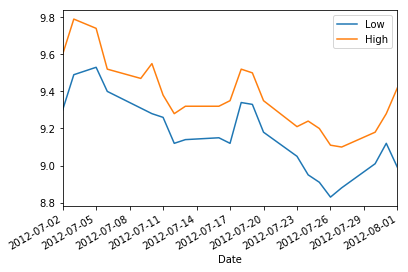

In [13]:
f['2012-07-01':'2012-08-01'][['Low','High']].plot()

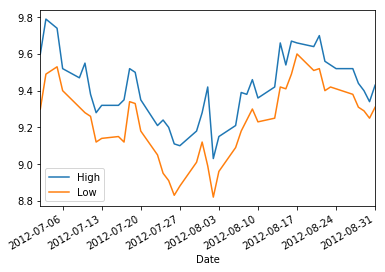

In [11]:
# %load snippets/prac1.py
f['2012-07':'2012-08'][['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

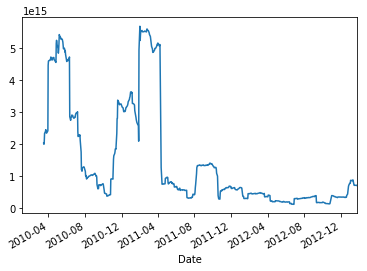

In [17]:
f.rolling(50).var()['Volume'].plot()

### Is the expanding window variance of the trading volume relatively stable over time?

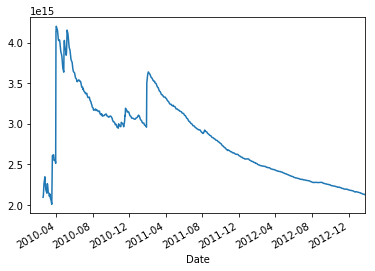

In [23]:
f.expanding(min_periods = 30).var()['Volume'].plot()
# No 

In [ ]:
# %load snippets/prac3.py

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [26]:
lagged = f.shift(1)
lagged

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,10.17,10.28,10.05,10.28,60855800.0,8.306784
2010-01-06,10.45,11.24,10.40,10.96,215620200.0,8.856260
2010-01-07,11.21,11.46,11.13,11.37,200070600.0,9.187561
2010-01-08,11.46,11.69,11.32,11.66,130201700.0,9.421897
2010-01-11,11.67,11.74,11.46,11.69,130463000.0,9.446138
2010-01-12,11.90,12.14,11.78,12.11,170626200.0,9.785520
2010-01-13,11.98,12.03,11.72,11.87,162995900.0,9.591588
2010-01-14,11.91,11.93,11.47,11.68,154527100.0,9.438058


In [29]:
sum((f-lagged)['Open']>0)

384

In [30]:
f['DayGain']=f['Open']-lagged['Open']

In [34]:
sum(f['DayGain']>0)/len(f['DayGain'])

0.49805447470817121

### And did the 'up' days become more or less frequent over time?

In [ ]:
# %load snippets/prac5.py
f.rolling(window = 25)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

### Compute and plot the mean monthly High value of the stock

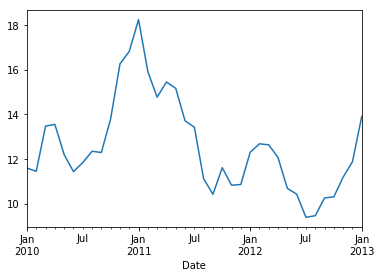

In [43]:
f['High'].resample('M').mean().plot()

### Explore the variance of the differenced volume

In [46]:
f['Difference']=f['Open']-f['Close']

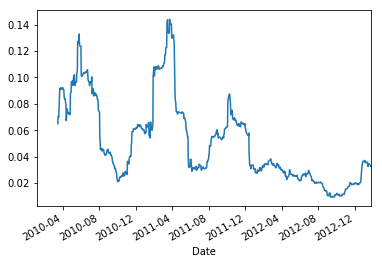

In [47]:
f.rolling(50).var()['Difference'].plot()

In [ ]:
# %load snippets/prac7.py
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window = 20).var().plot()

### Does the lagged time series correlate with itself?

In [50]:
# %load snippets/prac8.py
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.656441
real,0.656441,1.000000
